# 量化排雷

In [1]:
# 风险及免责提示：该策略由聚宽用户在聚宽社区分享，仅供学习交流使用。
# 原文一般包含策略说明，如有疑问请到原文和作者交流讨论。
# 原文网址：https://www.joinquant.com/view/community/detail/7c938ac8472bc8a2550a4d8214fea43f?type=1
# 标题：量化排雷—一个实用排雷系统

from jqdata import *
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import math
import warnings
#用来正常显示中文标签
mpl.rcParams['font.sans-serif']=['SimHei'] 
#用来正常显示负号
mpl.rcParams['axes.unicode_minus']=False 
warnings.filterwarnings('ignore') 

In [2]:
#获取属性所在的表格
def params(param):
    valuation=['code','day','capitalization','circulating_cap','market_cap','circulating_market_cap','turnover_ratio',
               'pe_ratio','pe_ratio_lyr','pb_ratio','ps_ratio','pcf_ratio']
    balance=['code','pubDate','statDate','cash_equivalents','settlement_provi','lend_capital','trading_assets','bill_receivable','account_receivable',
             'advance_payment','insurance_receivables','reinsurance_receivables','reinsurance_contract_reserves_receivable','interest_receivable',
             'dividend_receivable','other_receivable','bought_sellback_assets','inventories','non_current_asset_in_one_year','other_current_assets',
             'total_current_assets','loan_and_advance','hold_for_sale_assets','hold_to_maturity_investments','longterm_receivable_account',
             'longterm_equity_invest','investment_property','fixed_assets','constru_in_process','construction_materials','fixed_assets_liquidation',
             'biological_assets','oil_gas_assets','intangible_assets','development_expenditure','good_will','long_deferred_expense','deferred_tax_assets',
             'other_non_current_assets','total_non_current_assets','total_assets','shortterm_loan','borrowing_from_centralbank','deposit_in_interbank',
             'borrowing_capital','trading_liability','notes_payable','accounts_payable','advance_peceipts','sold_buyback_secu_proceeds','commission_payable',
             'salaries_payable','taxs_payable','interest_payable','dividend_payable','other_payable','reinsurance_payables','insurance_contract_reserves',
             'proxy_secu_proceeds','receivings_from_vicariously_sold_securities','non_current_liability_in_one_year','other_current_liability','total_current_liability',
             'longterm_loan','bonds_payable','longterm_account_payable','specific_account_payable','estimate_liability','deferred_tax_liability',
             'other_non_current_liability','total_non_current_liability','total_liability','paidin_capital','capital_reserve_fund','treasury_stock',
             'specific_reserves','surplus_reserve_fund','ordinary_risk_reserve_fund','retained_profit','foreign_currency_report_conv_diff',
             'equities_parent_company_owners','minority_interests','total_owner_equities','total_sheet_owner_equities']
    cash_flow=['code','pubDate','statDate','goods_sale_and_service_render_cash','net_deposit_increase','net_borrowing_from_central_bank',
               'net_borrowing_from_finance_co','net_original_insurance_cash','net_cash_received_from_reinsurance_business',
               'net_insurer_deposit_investment','net_deal_trading_assets','interest_and_commission_cashin','net_increase_in_placements',
               'net_buyback','tax_levy_refund','other_cashin_related_operate','subtotal_operate_cash_inflow','goods_and_services_cash_paid',
               'net_loan_and_advance_increase','net_deposit_in_cb_and_ib','original_compensation_paid','handling_charges_and_commission',
               'policy_dividend_cash_paid','staff_behalf_paid','tax_payments','other_operate_cash_paid','subtotal_operate_cash_outflow',
               'net_operate_cash_flow','invest_withdrawal_cash','invest_proceeds','fix_intan_other_asset_dispo_cash','net_cash_deal_subcompany',
               'other_cash_from_invest_act','subtotal_invest_cash_inflow','fix_intan_other_asset_acqui_cash','invest_cash_paid',
               'impawned_loan_net_increase','net_cash_from_sub_company','other_cash_to_invest_act','subtotal_invest_cash_outflow',
               'net_invest_cash_flow','cash_from_invest','cash_from_mino_s_invest_sub','cash_from_borrowing','cash_from_bonds_issue',
               'other_finance_act_cash','subtotal_finance_cash_inflow','borrowing_repayment','dividend_interest_payment','proceeds_from_sub_to_mino_s',
               'other_finance_act_payment','subtotal_finance_cash_outflow','net_finance_cash_flow','exchange_rate_change_effect',
               'cash_equivalent_increase','cash_equivalents_at_beginning','cash_and_equivalents_at_end']
    income=['code','pubDate','statDate','total_operating_revenue','operating_revenue','interest_income','premiums_earned',
            'commission_income','total_operating_cost','operating_cost','interest_expense','commission_expense','refunded_premiums',
            'net_pay_insurance_claims','withdraw_insurance_contract_reserve','policy_dividend_payout','reinsurance_cost','operating_tax_surcharges',
            'sale_expense','administration_expense','financial_expense','asset_impairment_loss','fair_value_variable_income','investment_income',
            'invest_income_associates','exchange_income','operating_profit','non_operating_revenue','non_operating_expense','disposal_loss_non_current_liability',
            'total_profit','income_tax_expense','net_profit','np_parent_company_owners','minority_profit','basic_eps','diluted_eps',
            'other_composite_income','total_composite_income','ci_parent_company_owners','ci_minority_owners']
    indicator=['code','pubDate','statDate','eps','adjusted_profit','operating_profit','value_change_profit','roe','inc_return',
               'roa','net_profit_margin','gross_profit_margin','expense_to_total_revenue','operation_profit_to_total_revenue',
               'net_profit_to_total_revenue','operating_expense_to_total_revenue','ga_expense_to_total_revenue','financing_expense_to_total_revenue',
               'operating_profit_to_profit','invesment_profit_to_profit','adjusted_profit_to_profit','goods_sale_and_service_to_revenue',
               'ocf_to_revenue','ocf_to_operating_profit','inc_total_revenue_year_on_year','inc_total_revenue_annual','inc_revenue_year_on_year',
               'inc_revenue_annual','inc_operation_profit_year_on_year','inc_operation_profit_annual','inc_net_profit_year_on_year','inc_net_profit_annual',
               'inc_net_profit_to_shareholders_year_on_year','inc_net_profit_to_shareholders_annual']
    if param in valuation:
        tab='valuation.'+param
    elif param in balance:
        tab='balance.'+param
    elif param in cash_flow:
        tab='cash_flow.'+param
    elif param in income:
        tab='income.'+param
    elif param in indicator:
        tab='indicator.'+param
    return tab

In [3]:
def statDate(date=None,num=1):
    # date:格式%Y-%m-%d,把str时间处理成time格式
# freq:'q'表现查询季报，‘y’表示查询年报
# num:获取的日期数
    if date:
        tt=time.strptime(date,"%Y-%m-%d")
    else:
        tt=time.localtime()
    a1=tt.tm_year-1
    if tt.tm_mon<5:
        loc_y=[str(a1-i) for i in range(1,num+1)]
    else:
        loc_y=[str(a1-i) for i in range(num)]
    return loc_y

In [4]:
#占比函数，param1/param2
def Proportion(code,param1,param2,date=None):
    tt=statDate(date=None,num=1)[0]
    tab1=params(param1)
    tab2=params(param2)
    df=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                             ).filter(
        valuation.code==code
        ),statDate=tt)
    rece_r=df.loc[0,param1]/df.loc[0,param2]
    return rece_r
code='000005.XSHE'
Proportion(code,'account_receivable','operating_revenue',date=None)

0.6167669604048673

In [5]:
#占比变动率
def Rate_of_change(code,param1,param2,date=None):
    tt=statDate(date=None,num=2)
    tab1=params(param1)
    tab2=params(param2)
    df1=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                             ).filter(
        valuation.code==code
        ),statDate=tt[0])
    df2=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                             ).filter(
        valuation.code==code
        ),statDate=tt[1])
    df=df1.append(df2,ignore_index=True)
    df['ratio']=df[param1]/df[param2]
    cha=df.loc[0,'ratio']/df.loc[1,'ratio']-1
    return cha
Rate_of_change(code,'account_receivable','total_sheet_owner_equities',date=None) 

0.4489723434001962

（1）应收账款占比：

该比例占比越高，显示公司赊销比例较高，公司的赊销的比例在某种程度上显示公司在产业链中的话语权，以及在行业中的地位。该比例越高，未来存在不能完全收回的风险。

In [6]:
# （+）应收账款占比 = 应收账款/营业收入
Proportion(code,'account_receivable','operating_revenue',date=None)

0.6167669604048673

(2)应收账款变动率

总体来说应收账款在公司总资产中的占比，一般保持较为稳定，该比例异常上升，是公司经营开始恶化的先兆。

In [7]:
# （+）应收账款变动率 = Δ 应收账款/总资产
Rate_of_change(code,'account_receivable','total_sheet_owner_equities',date=None) 

0.4489723434001962

(3)其他应收账款占比

In [8]:
# （+）其他应收账款占比 = 其他应收账款/总资产
Proportion(code,'other_receivable','total_assets',date=None)

0.25284669201167054

(4)其他应收账款变动率

In [9]:
# （+）其他应收账款变动率 = Δ 其他应收账款/总资产
Rate_of_change(code,'other_receivable','total_assets',date=None) 

0.6437148766125613

（5）存货占比

存货的占比应该结合存货的会计政策进行考虑。存货占比上升也是经营恶化、产品销售不畅的标志，当企业处于扩张的时候，存货占比也会小幅上升，或者企业为了应对不确定的不利因素，如贸易战备货，原材料处于上涨周期的备货等。

In [10]:
# (+)存货占比 = 存货/总资产

Proportion(code,'inventories','total_assets',date=None)

0.15344943340643677

(6)存货变动率

In [11]:
# (+)存货变动率 = Δ 存货/总资产
Rate_of_change(code,'inventories','total_assets',date=None)

0.07384175599729992

（7）软资产比例

此比例反应出企业资产空心化的程度，一般行业差异较大，轻资产行业该比例较高，需要结合行业属性考虑。

In [12]:
# (+)软资产比例 = (总资产 － 固定资产 － 在建工程 － 工程物资 － 货币资金) /总资产
def Proportion_of_soft_assets(code,date=None):
    tt=statDate(date=None,num=1)[0]
    tab1=params('total_assets')
    tab2=params('fixed_assets')
    tab3=params('constru_in_process')
    tab4=params('construction_materials')
    tab5=params('cash_equivalents')
    df=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                              ,eval(tab3)
                              ,eval(tab4)
                              ,eval(tab5)
                             ).filter(
        valuation.code==code
        ),statDate=tt)
    #对缺失值进行0填充
    df.fillna(0,inplace=True)
    df['ratio']=(df['total_assets']-df['fixed_assets']-df['constru_in_process']-df['construction_materials']-df['cash_equivalents'])/df['total_assets']
    return df.loc[0,'ratio']
Proportion_of_soft_assets(code,date=None)

0.9682697248721963

(8)现金销售率

该比例越低，雷的概率越大，财务操作只能在各个科目中进行腾挪，无法真的腾挪出真金白银。

In [13]:
# （-）现金销售率 = (营业收入－Δ应收账款) /营业收入
def Cash_sales_rate(code,date=None):
    tt=statDate(date=None,num=2)
    tab1=params('operating_revenue')#营业收入
    tab2=params('account_receivable')#应收账款
    df1=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                             ).filter(
        valuation.code==code
        ),statDate=tt[0])
    df2=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                             ).filter(
        valuation.code==code
        ),statDate=tt[1])
    df=df1.append(df2,ignore_index=True)
    cash=(df.loc[0,'operating_revenue']-df.loc[0,'account_receivable']+df.loc[1,'account_receivable'])/df.loc[0,'operating_revenue']
    return cash

df2=Cash_sales_rate(code,date=None)
df2

0.7803464999730606

（9）自由现金流变动

In [14]:
# 计算本期和上一期的差值△
def delta(df,param,a):
    return df.loc[a,param]-df.loc[a+1,param]   

In [30]:
# （-）自由现金流变动 = Δ（净利润-总应计）/总资产，其中：总应计 = (Δ 流动资产－ Δ 货币资金) － (Δ 流动负债 － Δ 一年内到期长期负债 － Δ 应交税费) － 折旧费用
def Free_cash_flow(code,date=None):
    tt=statDate(date=None,num=3)
    tab1=params('total_assets')#总资产
    tab2=params('net_profit')#净利润
    tab3=params('total_current_assets')#流动性资产
    tab4=params('cash_equivalents')#货币资金
    tab5=params('total_current_liability')#流动性负债
    tab6=params('non_current_liability_in_one_year')#一年内到期的非流动性负债
    tab7=params('taxs_payable')#应交税费
    tab8=params('long_deferred_expense')#长期待摊费用
    for b,date in enumerate(tt):
        df1=get_fundamentals(query(valuation.code
                                   ,valuation.day
                                   ,valuation.capitalization
                                   ,eval(tab1)#‘eval’把字符串转为可执行代码
                                   ,eval(tab2)
                                   ,eval(tab3)
                                   ,eval(tab4)
                                   ,eval(tab5)
                                   ,eval(tab6)
                                   ,eval(tab7)
                                   ,eval(tab8)
                                   ).filter(
            valuation.code==code
            ),statDate=date)
        if b==0:
            df=df1
        else:
            df=df.append(df1,ignore_index=True)
    ttl1=(delta(df,'total_current_assets',0)-delta(df,'cash_equivalents',0))-(delta(df,'total_current_liability',0)-delta(df,'non_current_liability_in_one_year',0)-delta(df,'taxs_payable',0))-df.loc[0,'long_deferred_expense']
    ttl2=(delta(df,'total_current_assets',1)-delta(df,'cash_equivalents',1))-(delta(df,'total_current_liability',1)-delta(df,'non_current_liability_in_one_year',1)-delta(df,'taxs_payable',1))-df.loc[1,'long_deferred_expense']
    ratio1=(df.loc[0,'net_profit']-ttl1)/df.loc[0,'total_assets']
    ratio2=(df.loc[1,'net_profit']-ttl2)/df.loc[1,'total_assets']
    ratio=ratio1/ratio2-1
    return ratio
df=Free_cash_flow(code,date=None)
df

-0.9026798002290719

(10)毛利率异常

In [16]:
#返回个股指定日期数据
def data_table(code,date=None,statdate=None,param='pe_ratio',freq='y'):
#     ‘date’：查询日期
#     'statdate':报告期，如‘2015q3’：表示2015年三季度报
#     ‘param’:查询的属性
    if statdate:
        tt=statdate
    else:
        tt=statDate(date=date,num=1)[0]

    df=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,valuation.capitalization
                              ,eval(params(param))#‘eval’把字符串转为可执行代码
                             ).filter(
        valuation.code==code
        ),statDate=tt)
    return df

In [17]:
#查询单个因素一段时间情况
def param_value(code,enddate=None,num=10,param='pe_ratio',freq='y'):
#     num：多少条数据
#    param：数据的字段名
#   freq：数据的时间间隔，如月‘M’，年‘y’，日'D'，3月为‘3M’
    t_list=statDate(date=enddate,num=num)
    for b,date in enumerate(t_list):
        df=data_table(code,statdate=date,param=param)
        if b==0:
            df1=df
        else:
            df1=df1.append(df)
    #重置索引
    df1=df1.reset_index(drop=True)
    #用后一个值填充空缺值
    df1.fillna(method='backfill',inplace=True)
    return df1

In [18]:
# 平均指标，（期初+期末）/2
def Average_param(code,date=None,statdate=None,param='pe_ratio',freq='y'):
    if statdate:
        tt=[statdate,str(int(statdate)-1)]
    else:
        tt=statDate(num=2)
    #获取标签所在表
    tab=params(param)
    #获取当前数据
    df1=get_fundamentals(query(valuation.code
#                                ,valuation.market_cap
                               ,valuation.day
                              #‘eval’把字符串转为可执行代码
                               ,eval(tab)
                               ).filter(
        valuation.code==code
        ),statDate=tt[0])
#     获取去年同期数据
    df2=get_fundamentals(query(valuation.code
#                                ,valuation.market_cap
                               ,valuation.day
                              #‘eval’把字符串转为可执行代码
                               ,eval(tab)
                               ).filter(
        valuation.code==code
        ),statDate=tt[1])
    #计算平均值
    df=df1.append(df2)
    df=df.reset_index(drop=True)
    #用后一个值填充空缺值
    df1.fillna(method='backfill',inplace=True)
    #修改第一个值为平均值
    df.loc[0,param]=df[param].mean()
    df.rename(columns={param:'avg_'+param},inplace=True)
    df.drop(index=1,axis=1,inplace=True)
    return df
df=Average_param(code,date=None,param='pe_ratio',freq='y')

In [19]:
df

,code,day,avg_pe_ratio
0,000005.XSHE,2018-12-28,-15.74775


In [20]:
#查询单个因素一段时间的同比增长率
def Average_param_Period(code,enddate=None,num=10,param='pe_ratio',freq='y'):
#     num：多少条数据
#    param：数据的字段名
#   freq：数据的时间间隔，如月‘M’，年‘y’，日'D'，3月为‘3M’
    t1=statDate(date=enddate,num=num)
    for b,date in enumerate(t1):
        #把日期转换成字符串格式
        df=Average_param(code,statdate=date,param=param,freq=freq)
        if b==0:
            df1=df
        else:
            df1=df1.append(df)
    #重置索引
    df1=df1.reset_index(drop=True).dropna()
        #用后一个值填充空缺值
    df1.fillna(method='backfill',inplace=True)
    return df1
Average_param_Period(code,enddate=None,num=3,param='pe_ratio',freq='y')

,code,day,avg_pe_ratio
0,000005.XSHE,2018-12-28,-15.74775
1,000005.XSHE,2017-12-29,-20.00610
2,000005.XSHE,2016-12-30,150.38180


In [21]:
def Operational_capability(code,num=10,freq='y'):
    
# 营业周期=存货周转天数+应收账款周转天数
# 存货周转率又名库存周转率，是企业一定时期营业成本（销货成本）与平均存货余额的比率
# # 存货周转天数=360/存货周转次数
# # 存货周转次数=主营业务成本/存货平均金额
# # 存货平均金额=(期初金额+期末金额)/2
# 应收账款周转天数=360/应收账款周转率=平均应收账款×360天/销售收入=平均应收账款/平均日销售额
# 应收账款周转率=（赊销净额/应收账款平均余额）=（(销售收入-现销收入-销售退回、折让、折扣)/[(期初应收账款余额+期末应收账款余额）/2])
    df1=Average_param_Period(code,enddate=None,num=num,param='inventories',freq=freq)#存货平均金额
    df2=param_value(code,enddate=None,num=num,param='operating_cost',freq=freq)#主营业务成本
    df3=Average_param_Period(code,enddate=None,num=num,param='account_receivable',freq=freq)#平均应收账款
    df4=param_value(code,enddate=None,num=num,param='operating_revenue',freq=freq)#销售收入
    df=df1.merge(df2,on=['day','code',])
    df=df.merge(df3,on=['day','code',])
    df=df.merge(df4,on=['day','code',])
    df['存货周转率']=df['operating_cost']/df['avg_inventories']
    df['存货周转天数']=360*df['avg_inventories']/df['operating_cost']
    df['应收账款周转天数']=360*df['avg_account_receivable']/df['operating_revenue']
    df['营业周期']=df['应收账款周转天数']+df['存货周转天数']
    df.drop(['operating_cost','avg_inventories','avg_account_receivable','operating_revenue','capitalization_x','capitalization_y'],axis=1,inplace=True)
    return df
df=Operational_capability(code,num=3,freq='y')
df

,code,day,存货周转率,存货周转天数,应收账款周转天数,营业周期
0,000005.XSHE,2018-12-28,0.763580,117.865778,45.624619,163.490397
1,000005.XSHE,2017-12-29,0.830680,108.344935,30.078712,138.423646
2,000005.XSHE,2016-12-30,0.927525,97.032394,22.028718,119.061112


In [22]:
# （+）毛利率连续 3 年提升且存货周转率连续 3 年下降，是取 1，否取 0。
def Abnormal_gross_profit_rate(code,date=None):
    tt=statDate(date=date,num=3)
    tab=params('gross_profit_margin')
    for b,date in enumerate(tt):
        df1=get_fundamentals(query(valuation.code
                                   ,valuation.day
                                   ,eval(tab)
                                   ).filter(
            valuation.code==code
            ),statDate=date)
        if b==0:
            df=df1
        else:
            df=df.append(df1,ignore_index=True)
    df_z=Operational_capability(code,num=3,freq='y')
    if df.loc[0,'gross_profit_margin']>df.loc[1,'gross_profit_margin']>df.loc[2,'gross_profit_margin'] and \
    df_z.loc[0,'存货周转率']<df_z.loc[1,'存货周转率']<df_z.loc[2,'存货周转率']:
        return 1
    else:
        return 0
            

（13）存贷双高

In [23]:
# 存贷双高，指公司账面上的货币资产与有息负债均处于较高水平。通常，“存”指广
# 义货币资金，包括货币资金（库存现金、银行存款、其他货币资金）以及应收票据、其他
# 流动资产，其流动性强。“贷”指有息负债，为企业负债中需要支付利息的债务，一般包
# 括短期借款，一年内到期的非流动负债，应付短期债券，长期借款，应付债券。此外，应
# 付票据，应付账款、其他应付款，也可能是有息的。
def Deposit_loan_double_high(code,date=None):
    tt=statDate(date=None,num=1)[0]
    tab1=params('cash_equivalents')
    tab2=params('bill_receivable')
    tab3=params('other_current_assets')
    tab4=params('total_assets')
#     货币资金占比 = 广义货币资金/总资产
#     其中，广义货币资金 = 货币资金 + 应收票据 + 其他流动资产

    df=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,eval(tab1)#‘eval’把字符串转为可执行代码
                              ,eval(tab2)
                              ,eval(tab3)
                              ,eval(tab4)
                             ).filter(
        valuation.code==code
        ),statDate=tt)
    df.fillna(0,inplace=True)
    deposit=(df.loc[0,'cash_equivalents']+df.loc[0,'bill_receivable']+df.loc[0,'other_current_assets'])/df.loc[0,'total_assets']
#     有息负债占比 = 有息负债/总资产
#     有息负债 = 短期借款 + 应付票据 + 一年内到期的非流动负债 + 应付短期债券 +长期借款 + 应付债券
    tab5=params('shortterm_loan')
    tab6=params('notes_payable')
    tab7=params('non_current_liability_in_one_year')
    tab8=params('bonds_payable')
    tab9=params('longterm_loan')
    tab10=params('longterm_account_payable')
    df1=get_fundamentals(query(valuation.code
                              ,valuation.day
                              ,eval(tab5)#‘eval’把字符串转为可执行代码
                              ,eval(tab6)
                              ,eval(tab7)
                              ,eval(tab8)
                              ,eval(tab9)
                              ,eval(tab10)
                             ).filter(
        valuation.code==code
        ),statDate=tt)
    df1.fillna(0,inplace=True)
    liabilities=df1.loc[0,'shortterm_loan']+df1.loc[0,'notes_payable']+df1.loc[0,'non_current_liability_in_one_year']+df1.loc[0,'bonds_payable']+df1.loc[0,'longterm_account_payable']+df1.loc[0,'longterm_loan']                                                                                                
    loan=liabilities/df.loc[0,'total_assets']
    if deposit>0.3 and loan>0.3:
        return 2
    else:
        return 0

（14）资金收益率异常

In [24]:
# code='000005.XSHE'
# Proportion(code,'interest_and_commission_cashin','cash_equivalents',date=None)

In [25]:
# 画图
def gauge(value,txt=None,kd1=0,kd2=100):
#     value:指针值
#     kd1：刻度起点角度
#     kd2:刻度结束角度d
    import numpy as np
    import matplotlib.pyplot as plt
    #分割圆周长
    a=np.pi/180
    k=kd2-kd1
    # 设置指针长度
    data = np.array([0.5,10,0.5,1]) # 数据
    # 指针的位置
    b=kd2*a-k*a*value/100
  
    # 指针的角度
    angles =[b+a*90,b,b-a*90,b+180*a]
    # 依次连接各个点，添加起点，形成闭合区域（指针线），二维数组
    data = np.concatenate((data, [data[0]])) 
    angles = np.concatenate((angles,[angles[0]]))
    # 把指针投射到极坐标中，
    plt.polar(angles, data, 'r', linewidth=2,)
    #把指针填充成实心
    plt.fill(angles, data, facecolor='red', alpha=1)
    # 标记指针刻度值
#     plt.text(angles[1], data[1],'%d'%(value))
    
    #做极坐标系
    #设置刻度区域,参数直接用角度，
    # 设置绘图标签
#     labels = np.array(['100','0']) 
#       这个函数不接受带有负角度的参数
#     plt.thetagrids([kd1,kd2],labels)

    # 填充刻度区域
    x1=np.linspace(kd1*a, kd2*a,k, endpoint=False)
    plt.fill_between(x1,0,10,facecolor='yellow',interpolate=True)
    
    # 绘制刻度，每10度，加一个长刻度
    dtl= (kd2*a-kd1*a)/50
    for i in range(1,50):
        plt.text(kd2*a, 7,'%d'%(0),horizontalalignment='center',verticalalignment='center')
        if i%5==0:
            a1 = np.concatenate(([kd2*a-i*dtl],[kd2*a-i*dtl]))
            a2 = np.concatenate(([8],[10]))
            plt.polar(a1, a2, 'b', linewidth=1)
            plt.text(kd2*a-i*dtl, 7,'%d'%(i*2),horizontalalignment='center',verticalalignment='center') 
        else:
            a1 = np.concatenate(([kd2*a-i*dtl],[kd2*a-i*dtl]))
            a2 = np.concatenate(([9],[10]))
            plt.polar(a1, a2, 'b', linewidth=0.5)
    plt.text(kd1*a, 7,'%d'%(100),horizontalalignment='center',verticalalignment='center')
#     对刻度进行分区填色
    k1=int((kd2-kd1)*0.3)
    k2=int((kd2-kd1)*0.7)
    plt.fill_between(x1[k2:],8,10,facecolor='g',interpolate=True)
    plt.fill_between(x1[k1:k2],8,10,facecolor='silver',interpolate=True)
    plt.fill_between(x1[0:k1],8,10,facecolor='r',interpolate=True)
    plt.ylim(0,10)
    # 隐藏y坐标轴
    plt.yticks(())
    plt.xticks(())
    # 获取图像对象
    ax = plt.gca()
    # 设置隐藏非绘图区
    ax.spines['polar'].set_color('none')
    # 设置背景颜色
    # # ax.patch.set_facecolor("gray")
    # 设置ax区域背景颜色透明度
    ax.patch.set_alpha(0.5)
    plt.text(90*a,4,'暴雷率',horizontalalignment='center',verticalalignment='center',fontsize=20 )
    plt.text(270*a,4,'{}%'.format(value),horizontalalignment='center',verticalalignment='center',fontsize=20 )
    if txt:
        plt.text(270*a,8,'{}'.format(txt),horizontalalignment='center',verticalalignment='center',fontsize=12,bbox=dict(facecolor='red', alpha=0.5) )
    else:
        pass
    plt.title('量化排雷')
    plt.show()

In [26]:
# 综合评分
def Thunderstorm_index(code,date=None):
    a=[]
#     (1)应收账款占比
    score1=Proportion(code,'account_receivable','operating_revenue',date=None)
    score1=int(np.where(score1>0.4501360353878518,1,0))
    if score1==1:
        a.append('应收账款占比异常')
#     (2)应收账款变动率
    score2=Rate_of_change(code,'account_receivable','total_sheet_owner_equities',date=None)
    score2=int(np.where(score2>0.30680924511535257,1,0))
    if score2==1:
        a.append('应收账款变动率异常')
#     (3)其他应收账款占比
    score3=Proportion(code,'other_receivable','total_assets',date=None)
    score3=int(np.where(score3>0.02586067243454865,1,0))
    if score3==1:
        a.append('其他应收账款占比异常')

#    (4)其他应收账款变动率
    score4=Rate_of_change(code,'other_receivable','total_assets',date=None)
    score4=int(np.where(score4>1.1095017533554583,1,0))
    if score4==1:
        a.append('其他应收账款变动率')
    
#     (5)存货占比
    score5=Proportion(code,'inventories','total_assets',date=None)
    score5=int(np.where(score5>0.2164,1,0))
    if score5==1:
        a.append('存货占比异常')
    
#     (6)存货变动率
    score6=Rate_of_change(code,'inventories','total_assets',date=None)
    score6=int(np.where(score6>0.2735,1,0))
    if score6==1:
        a.append('存货变动率异常')
    
#     (7)软资产比例
    score7=Proportion_of_soft_assets(code,date=None)
    score7=int(np.where(score7>0.7761,1,0))
    if score7==1:
        a.append('软资产比例异常')
    
#     (8)现金销售率
    score8=Cash_sales_rate(code,date=None)
    score8=int(np.where(score8<0.8271,1,0))
    if score8==1:
        a.append('现金销售率异常')
    
#     (9)自由现金流变动
    score9=Free_cash_flow(code,date=None)
    score9=int(np.where(score9<-0.26931,1,0))
    if score9==1:
        a.append('自由现金流变动异常')
    
#     (10)毛利率异常
    score10=Abnormal_gross_profit_rate(code,date=None)
    if score10==1:
        a.append('毛利率异常')
#     (11)商誉与净资产比
    score11=Proportion(code,'good_will','total_owner_equities',date=None)
    score11=int(np.where(score11>1.2,1,0))
    if score11==1:
        a.append('商誉与净资产比偏高')
#     (12)商誉与净利润比
    score12=Proportion(code,'good_will','total_profit',date=None)
    score12=int(np.where(score12>2,3,0))
    if score12==3:
        a.append('商誉与净利润比偏高,警示！')
#     (13)存贷双高
    score13=Deposit_loan_double_high(code,date=None)
    if score13==2:
        a.append('存贷双高，警示！')
        
    Comprehensive_score=100*(score1+score2+score3+score4+score5+score6+score7+score8+score9+score10+score11+score12+score13)/13
    b=[score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11,score12,score13]
#     有些项目危险性高，给分多，分值可能超过100
    value=min(round(Comprehensive_score,2),100)
    gauge(value,txt=str(a),kd1=-30,kd2=210)
    return a

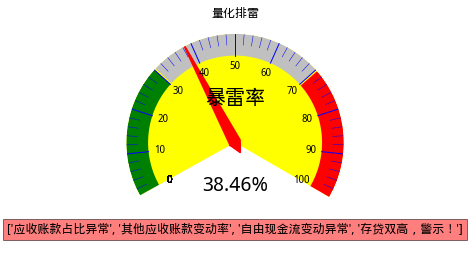

['应收账款占比异常', '其他应收账款变动率', '自由现金流变动异常', '存贷双高，警示！']

In [27]:
code='002450.XSHE'
Thunderstorm_index(code,date='2019-1-1')

In [37]:
# 指标值统计分析
def Statistics(function,date=None):
    #function：输入查看的函数str
    score_dict=[]
    stocks = list(get_all_securities(['stock']).index)
    for code in stocks:
        try:
            score=round(eval(function),4)
            score_dict.append({'code':code,'score':score})
        except KeyError:
            pass
    return pd.DataFrame(score_dict)
                  

In [38]:
a=Statistics("Proportion(code,'good_will','total_profit',date=None)",date=None)
a

,code,score
0,000001.XSHE,0.2348
1,000002.XSHE,0.0032
2,000004.XSHE,NaN
3,000005.XSHE,1.2901
4,000006.XSHE,NaN
5,000007.XSHE,NaN
6,000008.XSHE,8.2656
7,000009.XSHE,0.4881
8,000010.XSHE,-0.2803
9,000011.XSHE,NaN
